In [62]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#그래프 초기화
tf.reset_default_graph()

## Time series data

시간에 따라 변함

In [40]:
#open data
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')

데이터를 normalize시켜주자

In [41]:
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

이제 데이터를 지정해주자

In [42]:
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label

데이터를 불러왔으므로 필요한 변수들을 선언하자

In [43]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

이제 모델을 세우기 위한 x,y 데이터를 나눠주자

In [44]:
dataX=[]
dataY=[]

for i in range(0,len(y) - seq_length):
    _x=x[i:i+seq_length]
    _y=y[i+seq_length]
    
    print(_x,'->',_y)
    
    dataX.append(_x)
    dataY.append(_y)

[[  2.13751054e-01   2.08179810e-01   1.91791832e-01   4.66075110e-04
    1.92092403e-01]
 [  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 [  1.86678765e-01   2.09480567e-01   2.08781843e-01   0.00000000e+00
    2.17448151e-01]
 [  3.06973882e-01   3.14634137e-01   2.18993665e-01   1.24764722e-02
    2.16981885e-01]
 [  2.19142110e-01   2.63907214e-01   2.24686396e-01   4.56323384e-01
    2.24967473e-01]
 [  2.33129931e-01   2.36419163e-01   1.62682724e-01   5.70171193e-01
    1.47442742e-01]] -> [ 0.13289962]
[[  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 [  1.86678765e-01   2.09480567e-01   2.08781843e-01   0.00000000e+00
    2.17448151e-01]
 [  3.06973882e-01   3.14634137e-01   2.18993665e-01   1.24764722e-02
    2.169818

 [ 0.24190148  0.24150066  0.23056986  0.17044008  0.22890203]] -> [ 0.24344515]
[[ 0.24481558  0.24162202  0.25584951  0.11703863  0.24111364]
 [ 0.24382483  0.25558275  0.26142496  0.12906695  0.26265148]
 [ 0.2584829   0.25858884  0.27239951  0.09396791  0.26167525]
 [ 0.2584829   0.25734593  0.27395479  0.06329659  0.26865535]
 [ 0.25967769  0.26145023  0.27005206  0.09471184  0.26142749]
 [ 0.24190148  0.24150066  0.23056986  0.17044008  0.22890203]
 [ 0.2241836   0.23338424  0.24008019  0.09938155  0.24344515]] -> [ 0.2289311]
[[ 0.24382483  0.25558275  0.26142496  0.12906695  0.26265148]
 [ 0.2584829   0.25858884  0.27239951  0.09396791  0.26167525]
 [ 0.2584829   0.25734593  0.27395479  0.06329659  0.26865535]
 [ 0.25967769  0.26145023  0.27005206  0.09471184  0.26142749]
 [ 0.24190148  0.24150066  0.23056986  0.17044008  0.22890203]
 [ 0.2241836   0.23338424  0.24008019  0.09938155  0.24344515]
 [ 0.2076605   0.2330085   0.22726858  0.12089271  0.2289311 ]] -> [ 0.25248011]
[[

 [ 0.66505201  0.67159173  0.68288197  0.14057542  0.67489298]] -> [ 0.69978233]
[[ 0.60528355  0.60704884  0.61398266  0.14899166  0.60552907]
 [ 0.60312714  0.6318486   0.62489864  0.1631711   0.63298315]
 [ 0.61743552  0.62288258  0.63563838  0.11856234  0.61695367]
 [ 0.61839705  0.65031818  0.64350249  0.17223268  0.66314783]
 [ 0.65890328  0.66922157  0.68119467  0.14531684  0.67824467]
 [ 0.66505201  0.67159173  0.68288197  0.14057542  0.67489298]
 [ 0.66837414  0.68779524  0.69379777  0.17622121  0.69978233]] -> [ 0.70870054]
[[ 0.60312714  0.6318486   0.62489864  0.1631711   0.63298315]
 [ 0.61743552  0.62288258  0.63563838  0.11856234  0.61695367]
 [ 0.61839705  0.65031818  0.64350249  0.17223268  0.66314783]
 [ 0.65890328  0.66922157  0.68119467  0.14531684  0.67824467]
 [ 0.66505201  0.67159173  0.68288197  0.14057542  0.67489298]
 [ 0.66837414  0.68779524  0.69379777  0.17622121  0.69978233]
 [ 0.69090016  0.70454229  0.71510138  0.19015864  0.70870054]] -> [ 0.70412501]
[

트레인과 test셋을 나눠주자

약 70%를 train셋 나머지를 test셋으로 해주자

In [45]:
train_size = int(len(dataY)*0.7)
test_size=len(dataY)-train_size

trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

이제 rnn 모델을 만들어 주자

In [46]:
X= tf.placeholder(tf.float32, [None, seq_length,data_dim])
Y = tf.placeholder(tf.float32, [None, output_dim])

cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True)
outputs , _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# Fully connected
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn=None)

이제 loss 함수를 정하고 학습을 위한 준비를 하자

In [47]:
#loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))

#optimizer
optimizer= tf.train.AdamOptimizer(learning_rate)
train=optimizer.minimize(loss)

학습 가즈ㅏㅏㅏㅏㅏ

In [60]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(1000):
        _,l=sess.run([train,loss],feed_dict={X:trainX, Y:trainY})
        print(i, l)
    
    testPredict = sess.run(Y_pred, feed_dict={X:testX})        

0 71.7283
1 30.5005
2 8.53495
3 4.24344
4 11.2649
5 17.0493
6 16.3842
7 11.8114
8 6.75487
9 3.29427
10 2.0575
11 2.6277
12 3.99399
13 5.17353
14 5.64856
15 5.35195
16 4.48896
17 3.37246
18 2.30838
19 1.52692
20 1.14562
21 1.1568
22 1.44205
23 1.81797
24 2.10379
25 2.18539
26 2.04685
27 1.7585
28 1.43365
29 1.17847
30 1.0555
31 1.07029
32 1.18047
33 1.31918
34 1.42251
35 1.45096
36 1.39879
37 1.29015
38 1.16547
39 1.06466
40 1.01299
41 1.01426
42 1.05267
43 1.10159
44 1.13526
45 1.13855
46 1.11108
47 1.06486
48 1.01751
49 0.98432
50 0.97267
51 0.980488
52 0.998665
53 1.0158
54 1.02302
55 1.01708
56 1.00064
57 0.980298
58 0.963229
59 0.95415
60 0.953719
61 0.958874
62 0.964704
63 0.966852
64 0.963347
65 0.955109
66 0.945086
67 0.936615
68 0.931844
69 0.930941
70 0.932326
71 0.933676
72 0.93312
73 0.930044
74 0.925177
75 0.920024
76 0.916011
77 0.913794
78 0.913054
79 0.912807
80 0.912
81 0.910058
82 0.907099
83 0.903761
84 0.900791
85 0.898634
86 0.897247
87 0.896204
88 0.894981
89 0.893

686 0.400398
687 0.400269
688 0.400138
689 0.400015
690 0.399902
691 0.3998
692 0.399706
693 0.399619
694 0.399533
695 0.399447
696 0.399359
697 0.399268
698 0.399175
699 0.399079
700 0.398983
701 0.398885
702 0.398789
703 0.398693
704 0.398599
705 0.398507
706 0.398418
707 0.398334
708 0.398257
709 0.398188
710 0.398134
711 0.398098
712 0.398095
713 0.398137
714 0.398255
715 0.39848
716 0.398891
717 0.399543
718 0.400615
719 0.402121
720 0.404331
721 0.406722
722 0.409257
723 0.409926
724 0.408609
725 0.404296
726 0.399585
727 0.396651
728 0.39675
729 0.398927
730 0.401007
731 0.401425
732 0.399655
733 0.397252
734 0.395827
735 0.396087
736 0.397312
737 0.398163
738 0.397925
739 0.396734
740 0.395575
741 0.395171
742 0.395552
743 0.39615
744 0.396333
745 0.395945
746 0.395245
747 0.394717
748 0.394606
749 0.394816
750 0.395051
751 0.39505
752 0.394787
753 0.3944
754 0.394099
755 0.393988
756 0.394031
757 0.394109
758 0.394104
759 0.393979
760 0.393768
761 0.393554
762 0.3934
763 0.393

이제 결과를 그래프로 출력해보자

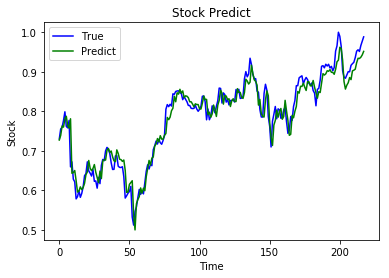

In [61]:
plt.plot(testY,'b-')
plt.plot(testPredict,'g-')
plt.legend(['True','Predict'],loc='upper left') 
plt.xlabel('Time')
plt.ylabel("Stock")
plt.title('Stock Predict')
plt.show()

## 참고사이트

1. https://www.youtube.com/watch?v=odMGK7pwTqY&list=PLlMkM4tgfjnLSOjrEJN31gZATbcj_MpUm&index=47

2. https://github.com/hunkim/DeepLearningZeroToAll/blob/master/lab-12-5-rnn_stock_prediction.py